In [13]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [17]:
df = pd.read_csv('surrounding.csv')


sinα = np.sin(df[' angle motors / °'] * np.pi/180)
cosα = np.cos(df[' angle motors / °'] * np.pi/180)


dist_us = df[' distance ultrasonic / mm'] + 65


def func(x, a, b):
    return a*(np.exp(b*x) - 1)

dist_in = func(df[' distance infrared / %'].to_numpy(), *[5.25744841e+02, 1.48802736e-02]) + 65


df['xu'] = dist_us * sinα + 40 * cosα
df['yu'] = dist_us * cosα - 40 * sinα

df['xi'] = dist_in * sinα - 40 * cosα
df['yi'] = dist_in * cosα + 40 * sinα


# condu = (dist_us > dist_in) | (dist_in > 900)
condu = 0.5 + np.arctan(np.pi*(dist_in - 800)/200) / np.pi

df['xc'] = condu * df['xu'] + (1-condu) * df['xi']
df['yc'] = condu * df['yu'] + (1-condu) * df['yi']

# df

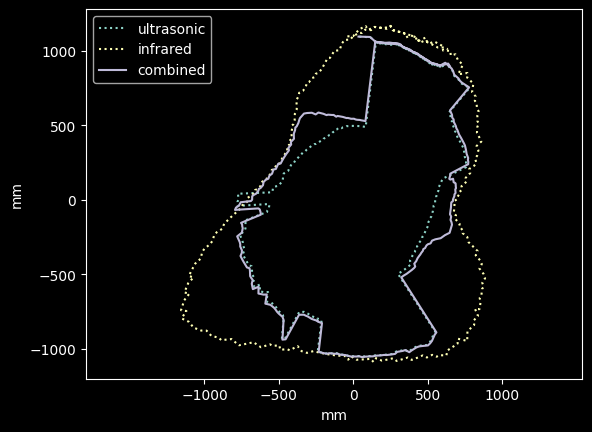

In [19]:
plt.plot(df['xu'], df['yu'], ':', label = 'ultrasonic' )
plt.plot(df['xi'], df['yi'], ':', label = 'infrared' )
plt.plot(df['xc'], df['yc'],      label = 'combined' )
plt.legend(loc = 'upper left')
plt.axis('equal')
plt.xlabel('mm')
plt.ylabel('mm')
plt.xticks(range(-1000,1001,500))
plt.yticks(range(-1000,1001,500))

plt.show()
# plt.savefig('surrounding.png', transparent=True)

In [18]:
# x = np.arange(0, 1500, 1)
# y = 0.5 + np.arctan(np.pi*(x - 800)/200) / np.pi

# plt.plot(x,y)
# plt.ylim([0,1])